In [79]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
import sklearn

# Parte 1. Regressione Lineare 

Utilizziamo la tabella integrate_titles che abbiamo prodotto durante il primo laboratorio. Vi ricordo che abbiamo effettuato integrazione di due dataset provenienti da Disney+ e Netflix, contenenti informazioni circa film e serie tv rilasciate sulle due piattaforme di streaming. Il dataset integrato è stato pulito e risulta quindi pronto per ulteriori analisi.

Importiamo il dataset:

In [80]:
#codice qui 
integrate_titles = pd.read_csv("integrate_titles_3.csv")

visualizziamo il dataset

In [81]:
#codice qui per vedere numero di elementi e informazioni sulle colonne, eliminare eventuali elementi nulli 
integrate_titles = integrate_titles.dropna(axis=0, subset=['tmdb_score'])
integrate_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4068 entries, 0 to 4169
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0.2          4068 non-null   int64  
 1   Unnamed: 0.1          4068 non-null   int64  
 2   Unnamed: 0            4068 non-null   int64  
 3   id                    4068 non-null   object 
 4   title                 4068 non-null   object 
 5   type                  4068 non-null   object 
 6   release_year          4068 non-null   int64  
 7   age_certification     2552 non-null   object 
 8   runtime               4068 non-null   int64  
 9   genres                4068 non-null   object 
 10  production_countries  4068 non-null   object 
 11  seasons               1543 non-null   float64
 12  imdb_id               4068 non-null   object 
 13  imdb_score            4068 non-null   float64
 14  imdb_votes            4063 non-null   float64
 15  tmdb_popularity      

Supponiamo di voler stimare una funzione che preveda l'imdb_score a partire dallo score tmdb. Prima di tutto, possiamo utilizzare una rappresentazione grafica per verificare se le due features siano correlate, e se sia quindi possibile utilizzare una di queste features per predire l'altra. 


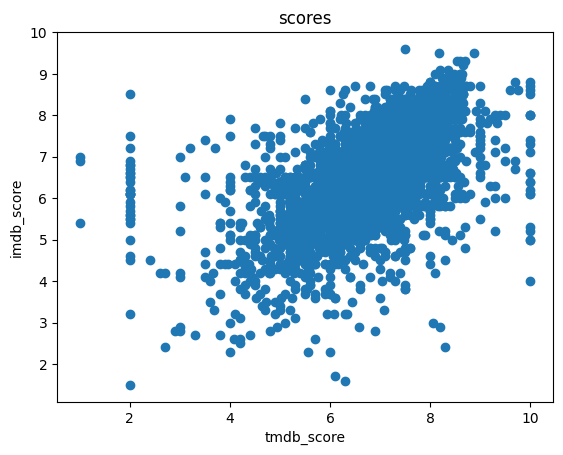

In [82]:
#codice qui 
plt.title('scores')
plt.xlabel('tmdb_score')
plt.ylabel('imdb_score')
plt.scatter(integrate_titles['tmdb_score'], integrate_titles['imdb_score'])

verifichiamo la correlazione utilizzando il coefficiente di correlazione di Pearson (r). 

Vi ricordo che r ha valori nell'intervallo [-1,1].  

Inoltre:

r in [0,0.3] debole correlazione;

r in [0.3,0.7] moderata correlazione;

r in [0.7,1] forte correlazione; 

i valori negativi del coefficiente di correlazione indicano una correlazione inversa, cioè all'aumentare di una caratteristica diminuisce l'altra e viceversa. 


In [83]:
#codice qui 
r = integrate_titles[['imdb_score','tmdb_score']].corr()

plottiamo in falsi colori

Text(0, 0.5, 'imdb_score')

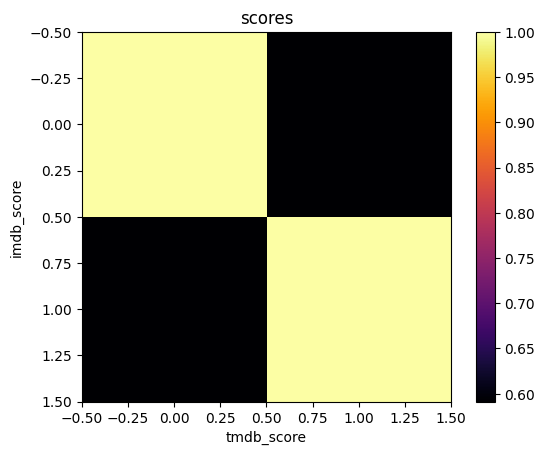

In [84]:
#codice qui
plt.figure()
plt.imshow(r,origin='upper', cmap='inferno', interpolation='nearest')
plt.colorbar()
plt.title('scores')
plt.xlabel('tmdb_score')
plt.ylabel('imdb_score')

# Osservo correlazione massima (colore = 1.00) quando confronto stessi dati

Ora ci chiediamo, quale modello di machine learning possiamo utilizzare per stimare una funzione che preveda l'imdb_score a partire dallo score tmdb. 

Dobbiamo determinare una relazione tra predittori e una variabile di risposta (che possiamo considerare continua).

Possiamo quindi utilizzare un modello di Regressione lineare.

Ricordate che dobbiamo dividere il dataset a disposizione in due diversi gruppi:

* Training Set -> porzione di dati che utilizziamo per il training del nostro modello di regressione lineare;

* Validation Set -> porzione di dati che utilizziamo per valutare il nostro modello precedentemente allenato.

Non esiste un unico modo per dividere il dataset in training e validation, normalmente, si utilizza un random split con una certa percentuale (per esempio 70/30 per training/test).


Usiamo la libreria scikit-learn, lo schema che dovrete usare e' il seguente:

1. Definire le caratteristiche da usare;
2. Definire X e y; 
3. Dividere il dataset in training e validation; 
4. Istanziare un oggetto della classe LinearRegression;
5. Allenare usando la funzione fit invocata sull'oggetto istanziato (passando il training set!);
6. Visualizzare i coefficienti imparati: useremo gli attributi *intercept_=* e *coef_* sull'oggetto ottenuto come output della funzione fit.

In scikit-learn esiste la funzione:

    X_train, X_valid, y_train, y_valid = train_test_split(X, y)

che effettua per noi lo splitting.

In [85]:
from sklearn.model_selection import train_test_split
#codice qui 
features = ['tmdb_score']
x = integrate_titles[features]
y = integrate_titles['imdb_score']
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=1)

adesso implementiamo la regressione

Intercept:  2.6007523263814782
Coefficient:  [0.59135946]


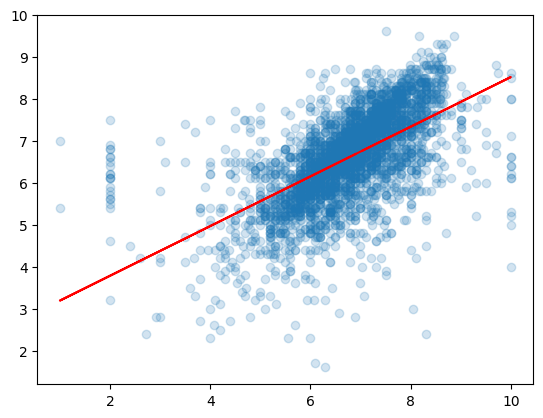

In [86]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

lin_reg = regressor.fit(X_train, y_train) # alleno sui dati di training

print('Intercept: ', lin_reg.intercept_)
print('Coefficient: ', lin_reg.coef_)

# segue y = ax + b
y_hat = X_train*lin_reg.coef_ + lin_reg.intercept_
plt.scatter(X_train, y_train, alpha=0.2)
plt.plot(X_train, y_hat, color='r')

Adesso possiamo usare il modello imparato, per effettuare predizioni sul validation set. E' sufficiente usare la funzione predict sull'oggetto restituito da fit, passando come argomento x_valid

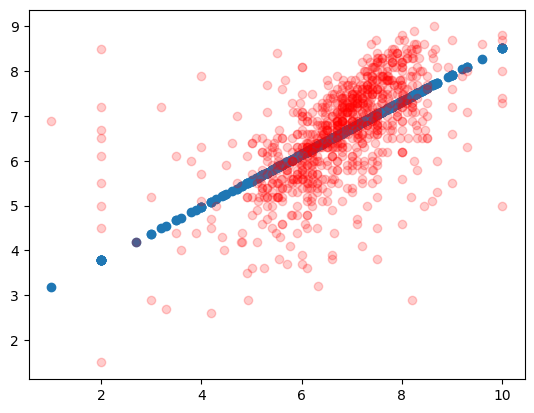

In [87]:
#codice qui 
y_hat = lin_reg.predict(X_valid)
plt.scatter(X_valid,y_hat) # retta di predizione
plt.scatter(X_valid,y_valid,c='r',alpha=0.2) # valori reali dei dati di validazione

Ora, come possiamo stimare la precisione della funzione che abbiamo imparato?

Sappiamo che non esiste una soluzione perfetta, ma possiamo trovare la soluzione migliore possibile, con i dati a disposizione. Per trovarla, useremo stime degli errori.

Abbiamo visto che ci sono tre metriche per valutare i modelli a regressione di machine learning:

lo scarto medio assoluto (MAE - Mean Absolute Error);
l’errore quadratico medio (MSE - Mean Squared Error);
la radice dell’errore quadratico medio (RMSE - Root of Mean Squared Error).
ESERCIZIO: scrivete una funzione che implementi ciascuna delle tre metriche sopra descritte.

In [88]:
def MSE (y_pred,y_true):

  #codice qui
  return 1/y_true.shape[0] * np.sum(np.abs(y_pred - y_true)**2)

def MAE (y_pred,y_true):

  #codice qui 
  return 1/y_true.shape[0] * np.sum(np.abs(y_pred - y_true))


def RMSE (y_pred,y_true):

  #codice qui
  return np.sqrt(1/y_true.shape[0] * np.sum(np.abs(y_pred - y_true)**2))

usate le tre funzioni appena definite, per calcolare le tre metriche sul modello di regressione lineare appena ottenuto (sul validation set)

In [89]:
#MAE
print('MAE:', MAE(y_hat, y_valid))

#MSE
print('MSE:', MSE(y_hat, y_valid))

#RMSE
print('RMSE:', RMSE(y_hat, y_valid))

MAE: 0.6924070247576123
MSE: 0.8581796853028785
RMSE: 0.9263798817455388


possiamo anche utilizzare le funzioni messe a disposizione da scikit-learn.

In [90]:
import sklearn.metrics as metrics 
print ('MAE:', metrics.mean_absolute_error(y_valid, y_hat))
print ('MSE:', metrics.mean_squared_error(y_valid, y_hat))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, y_hat)))

MAE: 0.6924070247576124
MSE: 0.8581796853028785
RMSE: 0.9263798817455388


Come faccio a sapere se questo risultato e' un buon risultato oppure no?

Determiniamo il modello nullo.

il modello nullo rappresenta in modo efficace il fatto di tirare a indovinare più e più volte il risultato atteso, e vedere l’efficacia del modello.

Nella regressione, possiamo sostituire tutti i valori della feature diametro con la media sull'intero dataset.

In [91]:
# Idea: osservo se il mio modello di predizione è più efficace (errore più basso) di un modello nullo in cui si tira a caso sempre la media

#calcolate lo score medio
mean_imdb_score = y_valid.mean()

# create la nuova x con lo stesso numero di campioni del validation set originale, e con tutti i valori uguali al valore medio dello score appena calcolato
null_model_y = [mean_imdb_score] * y_valid.shape[0]

#stampate gli errori
print ('MAE:', metrics.mean_absolute_error(y_valid, null_model_y))
print ('MSE:', metrics.mean_squared_error(y_valid, null_model_y))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, null_model_y)))

MAE: 0.8956546673991391
MSE: 1.2738858671045403
RMSE: 1.1286655249029893


ESERCIZIO.

* Adesso, utilizzate come test set la tabella amazon_titles. 

1. Pulite e preparate il dataset;

2. Applicate il modello di regressione imparato;

3. Sfruttate errori a dispozione e modello nullo per determinare se riusciamo a generalizzare bene verso questo set di dati.

In [92]:
#leggiamo e visualizziamo
amazon_titles = pd.read_csv('amazon_titles.csv')

In [93]:
#verifichiamo elementi nulli ed eliminamo
amazon_titles = amazon_titles.dropna(axis=0, subset=['tmdb_score'])
amazon_titles = amazon_titles.dropna(axis=0, subset=['imdb_score'])
amazon_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8141 entries, 0 to 10644
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8141 non-null   object 
 1   title                 8141 non-null   object 
 2   type                  8141 non-null   object 
 3   description           8079 non-null   object 
 4   release_year          8141 non-null   int64  
 5   age_certification     3285 non-null   object 
 6   runtime               8141 non-null   int64  
 7   genres                8141 non-null   object 
 8   production_countries  8141 non-null   object 
 9   seasons               1077 non-null   float64
 10  imdb_id               8141 non-null   object 
 11  imdb_score            8141 non-null   float64
 12  imdb_votes            8138 non-null   float64
 13  tmdb_popularity       8141 non-null   float64
 14  tmdb_score            8141 non-null   float64
dtypes: float64(5), int64

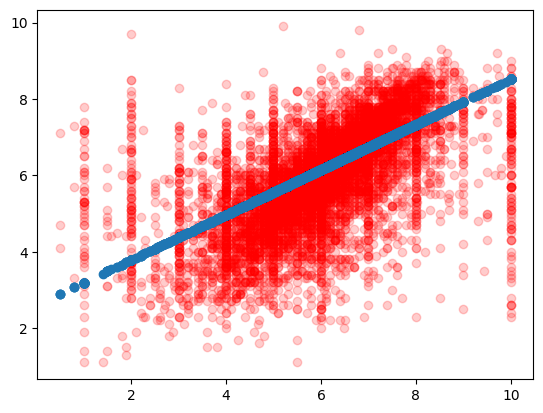

In [94]:
#applichiamo il modello imparato e visualizziamo
#codice qui 
y_hat = lin_reg.predict(amazon_titles[['tmdb_score']])
plt.scatter(amazon_titles['tmdb_score'],amazon_titles['imdb_score'],c='r',alpha=0.2) # valori reali dei dati di validazione
plt.scatter(amazon_titles['tmdb_score'],y_hat) # retta di predizione

calcoliamo gli errori corrispondenti

In [95]:
#codice qui, usate le funzioni scikit-learn
import sklearn.metrics as metrics 
print ('MAE:', metrics.mean_absolute_error(amazon_titles['imdb_score'], y_hat))
print ('MSE:', metrics.mean_squared_error(amazon_titles['imdb_score'], y_hat))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(amazon_titles['imdb_score'], y_hat)))

MAE: 0.8118198111964445
MSE: 1.2462549430527212
RMSE: 1.1163578920098702


In [96]:
# modello nullo 
mean_imdb_score = amazon_titles['imdb_score'].mean()
null_model_y = [mean_imdb_score] * amazon_titles['imdb_score'].shape[0]

#calcoliamo errori
print ('MAE:', metrics.mean_absolute_error(amazon_titles['imdb_score'], null_model_y))
print ('MSE:', metrics.mean_squared_error(amazon_titles['imdb_score'], null_model_y))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(amazon_titles['imdb_score'], null_model_y)))

MAE: 1.0678085169475153
MSE: 1.7812227138859158
RMSE: 1.3346245591498442


cosa pensate del modello imparato? traete le opportune conclusioni

In [97]:
# Osservazioni
# Si nota che il modello imparato ha un errore minore rispetto al modello nullo, dunque è più efficace e accurato (segue 'bene' la variazione dei nostri dati).

# Parte 2. Regressione Logistica 

Adesso, proviamo a risolvere un problema di classificazione, utilizzando la regressione logistica, come visto a lezione. 


Riuscite a trasformare il nostro problema di stimare imdb_score a partire dal tmdb_score, da regressione a classificazione? 

**tip** create una nuova colonna e provate a creare la caratteristica *above_average* che sia:

- 1 Se imdb_score > mean(imdb_score);
- 0 altrimenti. 

Usiamo il dataset integrate_titles come fatto in precedenza. 

In [98]:
#creiamo la colonna integrate_titles['above_average']
integrate_titles['above_average'] = (integrate_titles['imdb_score'] > integrate_titles['imdb_score'].mean()).astype(int)

In [99]:
from sklearn.linear_model import LogisticRegression

Passi da eseguire (molto simile a quanto gia' fatto):

1. Splittare dataset in training e test;
2. Istanziare un oggetto della classe LogisticRegression;
3. Fare fit su training set;
4. Usare la funzione score che fornisce l'accuratezza intesa come numero di volte in cui abbiamo predetto correttamente la classe rispetto al totale.

In [100]:
#codice qui
features = ['tmdb_score']
x = integrate_titles[features]
y = integrate_titles['above_average'] # mi ritorna se il valore di imdb sta sopra o sotto la media rispetto al tmdb
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=1)

clf = LogisticRegression()

clf.fit(X_train, y_train) # alleno sui dati di training

y_hat_train = clf.predict(X_train)
y_hat_valid = clf.predict(X_valid)
print('Training:',clf.score(X_train, y_train))
print('Validation:',clf.score(X_valid, y_valid))

# Nota: lo score (accuratezza) si basa sulla matrice True,False (V) | Positive,Negative: rapporto TP+TN / TP+TN+FN+FP

# Classificazione visualizzabile con:
# print(y_hat_valid)

Training: 0.7725875845113707
Validation: 0.7936117936117936


Benissimo, siamo riusciti a raggiungere un'accuratezza del 80% con un modello di logistic regression. 

quale sarebbe un opportuno modello nullo per confrontare?

possiamo immaginare di predire sempre la classe più comune. Verificate quale sia, e deducete score per il modello nullo. 

In [101]:
#codice qui per modello nullo (ritorna sempre la classe più comune all'interno del mio dato)
print(np.sum(integrate_titles['above_average']==1)/integrate_titles['above_average'].shape[0]) # stampo l'accuratezza del modello nullo

0.5491642084562438


traete le vostre conclusioni.

In [102]:
# Osservazione: notiamo che il nostro modello imparato è più accurato del modello nullo, in quanto presenta una percentuale di precisione maggiore.
print(amazon_titles['tmdb_score'].to_numpy())

[8.263 7.357 7.6   ... 6.    5.    6.2  ]


Compito per casa.

Provate ad utilizzare il dataset di amazon come test, e ripetete tutto quanto visto per la tabella integrata di netflix e disney plus. 

In [103]:
# AMAZON
#applichiamo il modello imparato
#codice qui
amazon_titles['above_average'] = (amazon_titles['imdb_score'] > amazon_titles['imdb_score'].mean()).astype(int)
features = ['tmdb_score']
x = amazon_titles[features]
y = amazon_titles['above_average']

y_hat = clf.predict(amazon_titles[['tmdb_score']])
print('Testing:', clf.score(amazon_titles[['tmdb_score']], amazon_titles['above_average']))

# Osserviamo che otteniamo un'accuratezza del 70%

Testing: 0.7011423658027269


In [104]:
#codice qui per modello nullo (ritorna sempre la classe più comune all'interno del mio dato)
print(np.sum(amazon_titles['above_average']==1)/amazon_titles['above_average'].shape[0]) # stampo l'accuratezza del modello nullo

0.5195921876919297


In [105]:
# Osservazione: il modello imparato ha un'accuratezza del 70%, maggiore di quella del modello nullo (52%); dunque abbiamo ottenuto un modello efficace.